In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import numpy as np

In [2]:
SHANNON_EXTENT = [-9, -7, 52.5, 54.25]

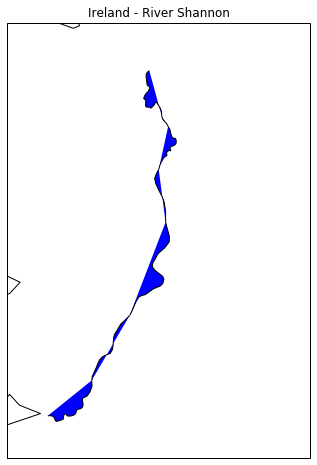

In [3]:
rivers_file = shapereader.natural_earth(
    resolution = '10m',
    category = 'physical',
    name = 'rivers_lake_centerlines_scale_rank'
)

rivers_shp = shapereader.Reader(rivers_file)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(29902))
ax.set_title("Ireland - River Shannon")

for rec in rivers_shp.records():
    if rec.attributes['name'] == 'Shannon':
        ax.add_geometries([rec.geometry], ccrs.PlateCarree(), edgecolor='black', facecolor='blue')
    pass

ax.coastlines(resolution='50m')
ax.set_extent(SHANNON_EXTENT)


## Extracting coordiantes of the river

In [4]:
shannon_cords = []

for rec in rivers_shp.records():
    if rec.attributes['name'] == 'Shannon':
        for linestring in rec.geometry:
            for coords in linestring.coords:
                shannon_cords.append(coords)
    pass

In [5]:
boundary = np.array(shannon_cords)

## Plot boundary

<Figure size 3600x1440 with 0 Axes>

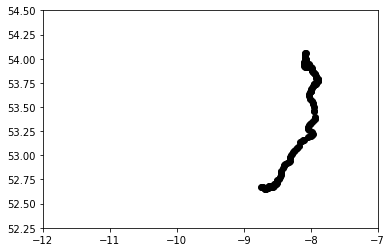

<Figure size 3600x1440 with 0 Axes>

In [46]:
plt.plot(boundary[:,0], boundary[:,1], 'ko')
plt.axis([-12, -7, 52.25, 54.5])
plt.figure(figsize=(50,20))

## Creating the mesh

In [13]:
from meshpy.triangle import MeshInfo, build

In [25]:
mesh_info = MeshInfo()
mesh_info.set_points(boundary)
mesh_info.set_facets([list(range(0, len(boundary)))])
mesh = build(mesh_info)
# print("Mesh Points:")
# for i, p in enumerate(mesh.points):
#     print(i, p)
# print("Point numbers in tetrahedra:")
# for i, t in enumerate(mesh.elements):
#     print(i, t)

ValueError: value must be a sequence of length self.unit

In [22]:
list(range(0, len(boundary)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142]